In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import os
import cv2
import numpy as np


In [2]:
import keras
from keras.layers import (Activation, BatchNormalization, Conv2D, Dense,
                          Dropout, Flatten, MaxPooling2D)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessing DATA

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [4]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
x_train=train_datagen.flow_from_directory('data/train',target_size=(64,64),batch_size=32,class_mode='categorical')

Found 15341 images belonging to 6 classes.


In [7]:
x_test=test_datagen.flow_from_directory('data/test',target_size=(64,64),batch_size=32,class_mode='categorical')

Found 6825 images belonging to 6 classes.


In [8]:
x_train.class_indices

{'Left Bundle Branch Block': 0,
 'Normal': 1,
 'Premature Atrial Contraction': 2,
 'Premature Ventricular Contractions': 3,
 'Right Bundle Branch Block': 4,
 'Ventricular Fibrillation': 5}

In [9]:
x_test.class_indices

{'Left Bundle Branch Block': 0,
 'Normal': 1,
 'Premature Atrial Contraction': 2,
 'Premature Ventricular Contractions': 3,
 'Right Bundle Branch Block': 4,
 'Ventricular Fibrillation': 5}

In [10]:
model=Sequential()

In [11]:
model.add(Convolution2D(32,(3,3),padding="same",input_shape=(64,64,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

In [12]:
model.add(Convolution2D(32,(3,3),padding="same",input_shape=(64,64,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


In [13]:
model.add(Convolution2D(32,(3,3),padding="same",input_shape=(64,64,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

In [14]:
model.add(Flatten())#ANN INPUT

In [15]:
model.add(Dense(units=128,kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None),activation="elu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

In [16]:
model.add(Dense(units=128,kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None),activation="elu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

In [17]:
model.add(Dense(units=64,kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None),activation="elu"))
model.add(Dropout(0.2))

In [18]:
model.add(Dense(units=64,kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None),activation="elu"))
model.add(Dropout(0.2))

# Adding output layer

In [19]:
model.add(Dense(units=6,kernel_initializer="random_uniform",activation="softmax"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [21]:
from keras.optimizers import RMSprop , SGD , Adam
from keras.callbacks import ModelCheckpoint , EarlyStopping , ReduceLROnPlateau

# Train The Model

In [22]:
""""
##earlystop = EarlyStopping(monitor="val_loss",
                        min_delta=0,
                        patience=1,
                        restore_best_weights=True,
                        verbose=1)"""
reduce_lr = ReduceLROnPlateau(monitor="val_loss",
                             factor=0.2,
                             patience=2,
                             verbose=1,
                             min_delta=0.0001)

In [23]:
callbacks=[reduce_lr]
model.compile(loss="categorical_crossentropy",optimizer=Adam(lr=0.01,beta_1=0.1),metrics=['accuracy'])
batch_size=3

In [24]:
model.fit_generator(x_train,steps_per_epoch=len(x_train)/batch_size,epochs=25,callbacks=callbacks,validation_data=x_test,validation_steps=10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
160/160 [==============================] - 15s 91ms/step - loss: 1.0046 - accuracy: 0.6531 - val_loss: 583.9680 - val_accuracy: 0.1156
Epoch 2/25
160/160 [==============================] - 15s 92ms/step - loss: 0.7331 - accuracy: 0.7654 - val_loss: 301.2160 - val_accuracy: 0.1000
Epoch 3/25
160/160 [==============================] - 14s 88ms/step - loss: 0.5730 - accuracy: 0.8122 - val_loss: 18.4302 - val_accuracy: 0.0344
Epoch 4/25
160/160 [==============================] - 14s 88ms/step - loss: 0.5220 - accuracy: 0.8299 - val_loss: 76.3400 - val_accuracy: 0.0406
Epoch 5/25
160/160 [==============================] - 14s 90ms/step - loss: 0.5005 - accuracy: 0.8392 - val_loss: 11.5284 - val_accuracy: 0.1969
Epoch 6/25
160/160 [==============================] - 14s 88ms/step - loss: 0.4508 - accuracy: 0.8567 - val_loss: 52.7344 - val_accuracy: 0.1688
Epoch 7/25
160/160 [==============================] 

In [38]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("ECG.h5")

In [39]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Testing Data

In [43]:
model=load_model('ECG.h5')

In [44]:
img=image.load_img("data/testing/test.png",target_size=(64,64))

In [45]:
x=image.img_to_array(img)

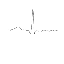

In [46]:
img

In [47]:
x=image.img_to_array(img)
x.shape

(64, 64, 3)

In [48]:
x=np.expand_dims(x,axis=0)
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [49]:
pred=model.predict(x)
y_pred=np.argmax(pred)
y_pred

3

In [50]:
index=['left Bundle Branch block',
       'Ventricular Fibrillation',
       'Premature Atrial Contraction',
       'Premature Ventricular Contraction',
       'Right Bundle Branch Block',
       'Normal']

In [51]:
result = str(index[y_pred])
result

'Premature Ventricular Contraction'